In [1]:
include("../src/InfectionSim.jl")
include("../src/ODEFIT.jl")
include("../src/MPC.jl")

plot! (generic function with 4 methods)

In [2]:
param = initParams(
    symptomatic_isolation_prob = 0.95,
    asymptomatic_prob = 0.50,
    LOD = 5
)
SIRres, SIRp = FitRandControlledEnsemble(:SIR, 30, 500, param, show_trace=true)
SEIRres, SEIRp = FitRandControlledEnsemble(:SEIR, 30, 500, param, show_trace=true)

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     4.473752e-01     1.004494e-01
 * time: 0.034668922424316406
    50     1.149938e-01     8.091705e-07
 * time: 3.725417137145996
Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     5.945000e-01     1.210041e-01
 * time: 0.0001518726348876953
    50     8.620967e-02     1.015097e-03
 * time: 3.2944259643554688
   100     7.646012e-02     4.509673e-05
 * time: 6.673102855682373
   150     7.541825e-02     8.945779e-07
 * time: 10.022235870361328


( * Status: success

 * Candidate solution
    Final objective value:     7.541486e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   13  (vs limit Inf)
    Iterations:    187
    f(x) calls:    323
, [0.11238919429829526, 0.4365904429717493, 0.2905227333589981, 0.6085471232586336, -0.18309988643573039])

In [3]:
SIRmpc = initSIR_MPC(SIRp)
SEIRmpc = initSEIR_MPC(SEIRp)

SEIR_MPC(A JuMP Model
Minimization problem with:
Variables: 100
Objective function type: GenericQuadExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 4 constraints
`GenericQuadExpr{Float64,VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 76 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 20 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 20 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt
Names registered in the model: E, I, R, S, T, 20, 3, 20.0, 20.0, 10.0, 10.0, ParameterRef[noname_param, noname_param, noname_param, noname_param])

In [4]:
state = initState(param)

State(562339, [19499, 40482, 24172, 28890, 32088, 26676, 33722, 33392, 25068, 29744, 22865, 29391, 1135, 31846], 58691, 1000000, [0 0 … 0 0])

# SIR MPC Test

In [5]:
act = OptimalAction(SIRmpc, state)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      288
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      496

Total number of variables............................:       80
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equa

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

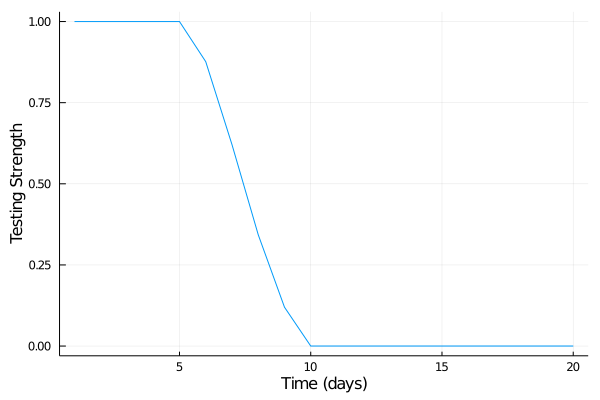

In [6]:
plot(SIRmpc, :T)

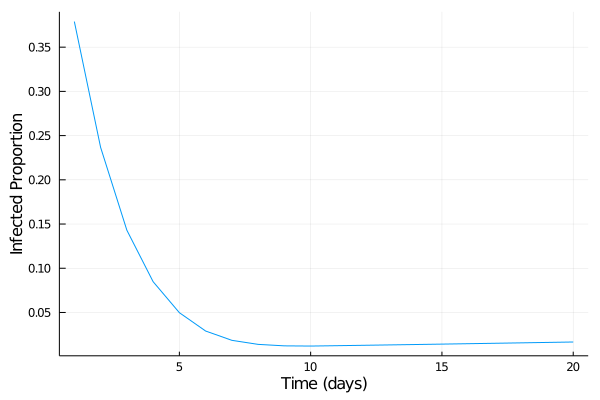

In [7]:
plot(SIRmpc,:I)

# SEIR MPC Test

In [8]:
act = OptimalAction(SEIRmpc, state)

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      422
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      744

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       80
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

3-element Array{Float64,1}:
 1.0
 1.0
 0.6952850209620094

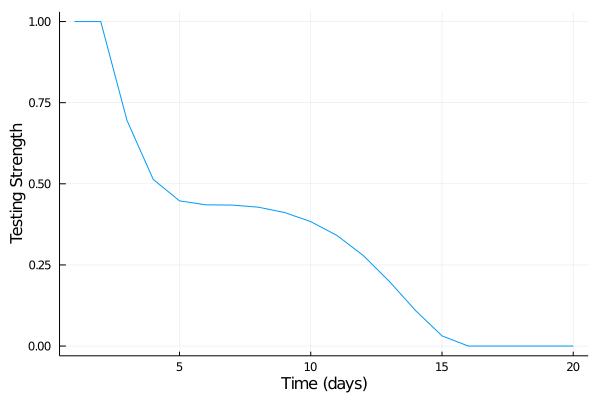

In [9]:
plot(SEIRmpc, :T)

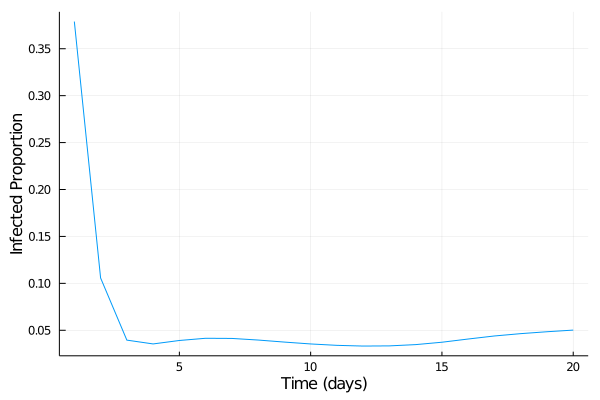

In [10]:
plot(SEIRmpc, :I)

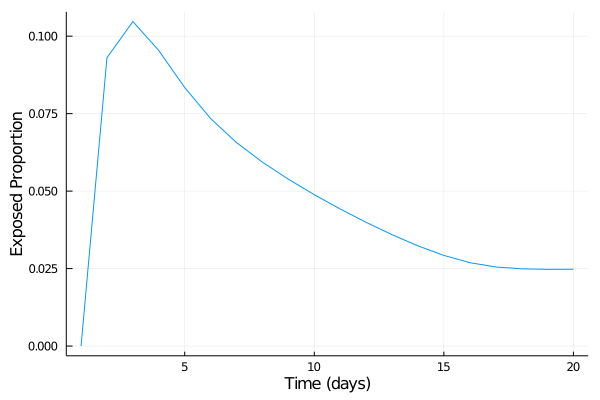

In [11]:
plot(SEIRmpc, :E)